In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
path_files = '/Volumes/LaCie/MAC STUFF/desktop/Masters'
new_path = path_files + '/newglobbys/m001p.ascd.gz'
df = pd.read_table(new_path, compression='gzip', sep='\s+', skipinitialspace =True,header=0, 
                   names=['RA', 'Dec','iccd','xg','yg','g','dg','ig','xi','yi', 'i','di','ii','ia','field', '#'])
df.drop('#', axis=1)

,RA,Dec,iccd,xg,yg,g,dg,ig,xi,yi,i,di,ii,ia,field
0,1:40:16.989,+28:00:57.76,1,1336.40,2444.44,13.980,0.001,-9,1331.40,2446.13,13.617,0.001,-9,0,1
1,1:40:16.292,+27:59:37.16,1,1284.40,2881.92,13.987,0.001,-9,1279.02,2883.41,13.543,0.001,-9,0,1
2,1:40:22.707,+28:06:54.38,1,1759.30,499.18,14.142,0.001,-9,1755.99,501.99,13.751,0.001,-9,0,1
3,1:40:18.118,+28:01:38.52,1,1418.71,2222.32,14.157,0.001,-9,1413.90,2224.12,13.668,0.001,-9,0,1
4,1:40:18.067,+28:03:32.81,1,1418.15,1601.52,14.513,0.001,-9,1413.90,1603.56,13.821,0.001,-9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115662,1:36:06.879,+27:08:40.89,36,1842.90,48.88,35.330,8.078,0,1828.10,131.30,25.181,0.320,-1,0,1
115663,1:36:06.216,+27:08:40.80,36,1891.25,47.99,35.330,8.078,0,1876.43,130.48,27.013,1.136,0,0,1
115664,1:36:04.285,+27:08:39.52,36,2032.33,39.90,35.330,8.078,0,2017.47,122.60,34.670,8.322,0,0,1
115665,1:36:04.309,+27:08:35.52,36,2030.91,18.08,35.330,8.078,0,2016.07,100.78,27.231,1.281,0,0,1


<AxesSubplot:>

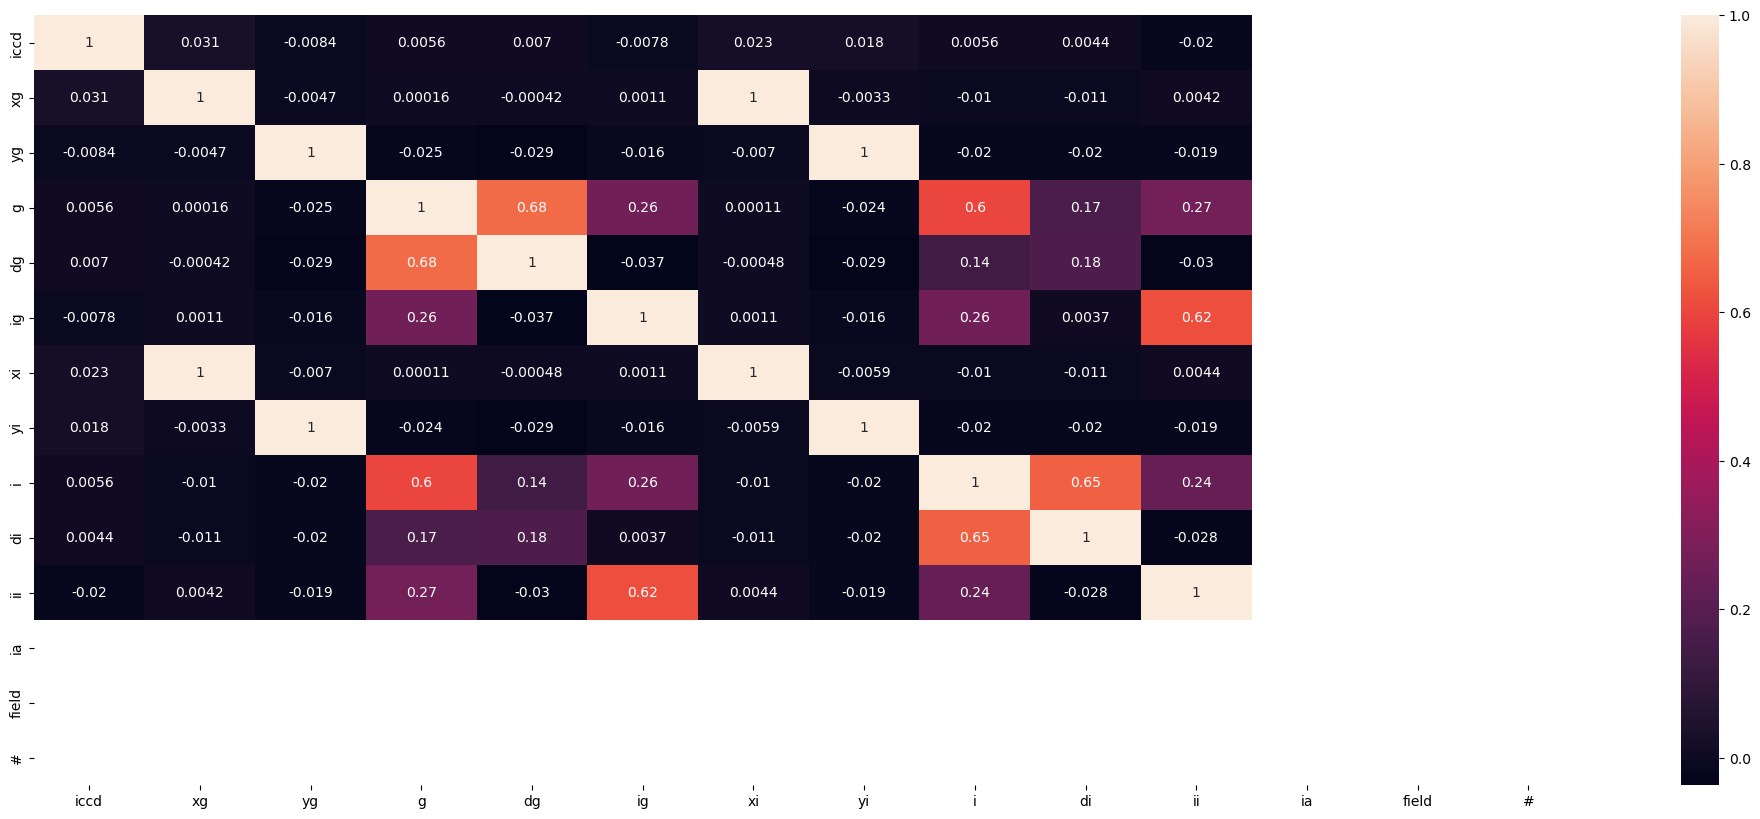

In [5]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot = True)

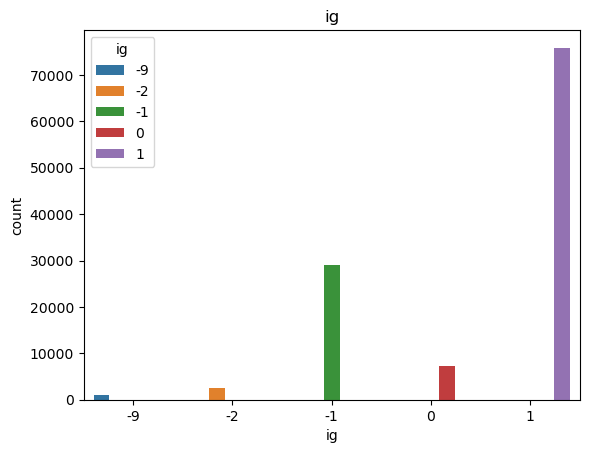

In [6]:
categorical_list = ["ig"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "ig")
    plt.title(i)

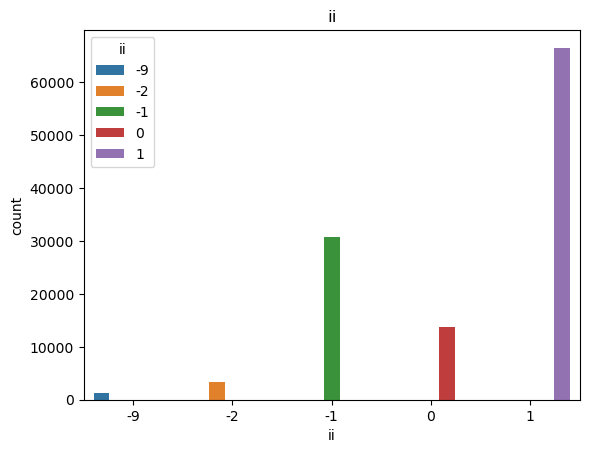

In [7]:
categorical_list = ["ii"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "ii")
    plt.title(i)

In [8]:
data = pd.read_csv("master_gc_gals_catalog.csv")
data["CLASS"].value_counts()

6.0    735
1.0    686
4.0    502
2.0    197
5.0     23
3.0     20
8.0     13
9.0      6
7.0      2
Name: CLASS, dtype: int64

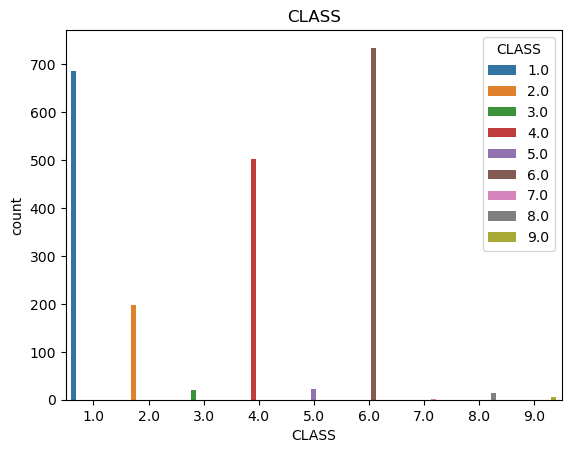

In [9]:
categorical_list = ["CLASS"]
df_categoric = data.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "CLASS")
    plt.title(i)

In [10]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
df.head()
# y_pred = clf.fit_predict(df) 


,RA,Dec,iccd,xg,yg,g,dg,ig,xi,yi,i,di,ii,ia,field,#
0,1:40:16.989,+28:00:57.76,1,1336.40,2444.44,13.980,0.001,-9,1331.40,2446.13,13.617,0.001,-9,0,1,NaN
1,1:40:16.292,+27:59:37.16,1,1284.40,2881.92,13.987,0.001,-9,1279.02,2883.41,13.543,0.001,-9,0,1,NaN
2,1:40:22.707,+28:06:54.38,1,1759.30,499.18,14.142,0.001,-9,1755.99,501.99,13.751,0.001,-9,0,1,NaN
3,1:40:18.118,+28:01:38.52,1,1418.71,2222.32,14.157,0.001,-9,1413.90,2224.12,13.668,0.001,-9,0,1,NaN
4,1:40:18.067,+28:03:32.81,1,1418.15,1601.52,14.513,0.001,-9,1413.90,1603.56,13.821,0.001,-9,0,1,NaN


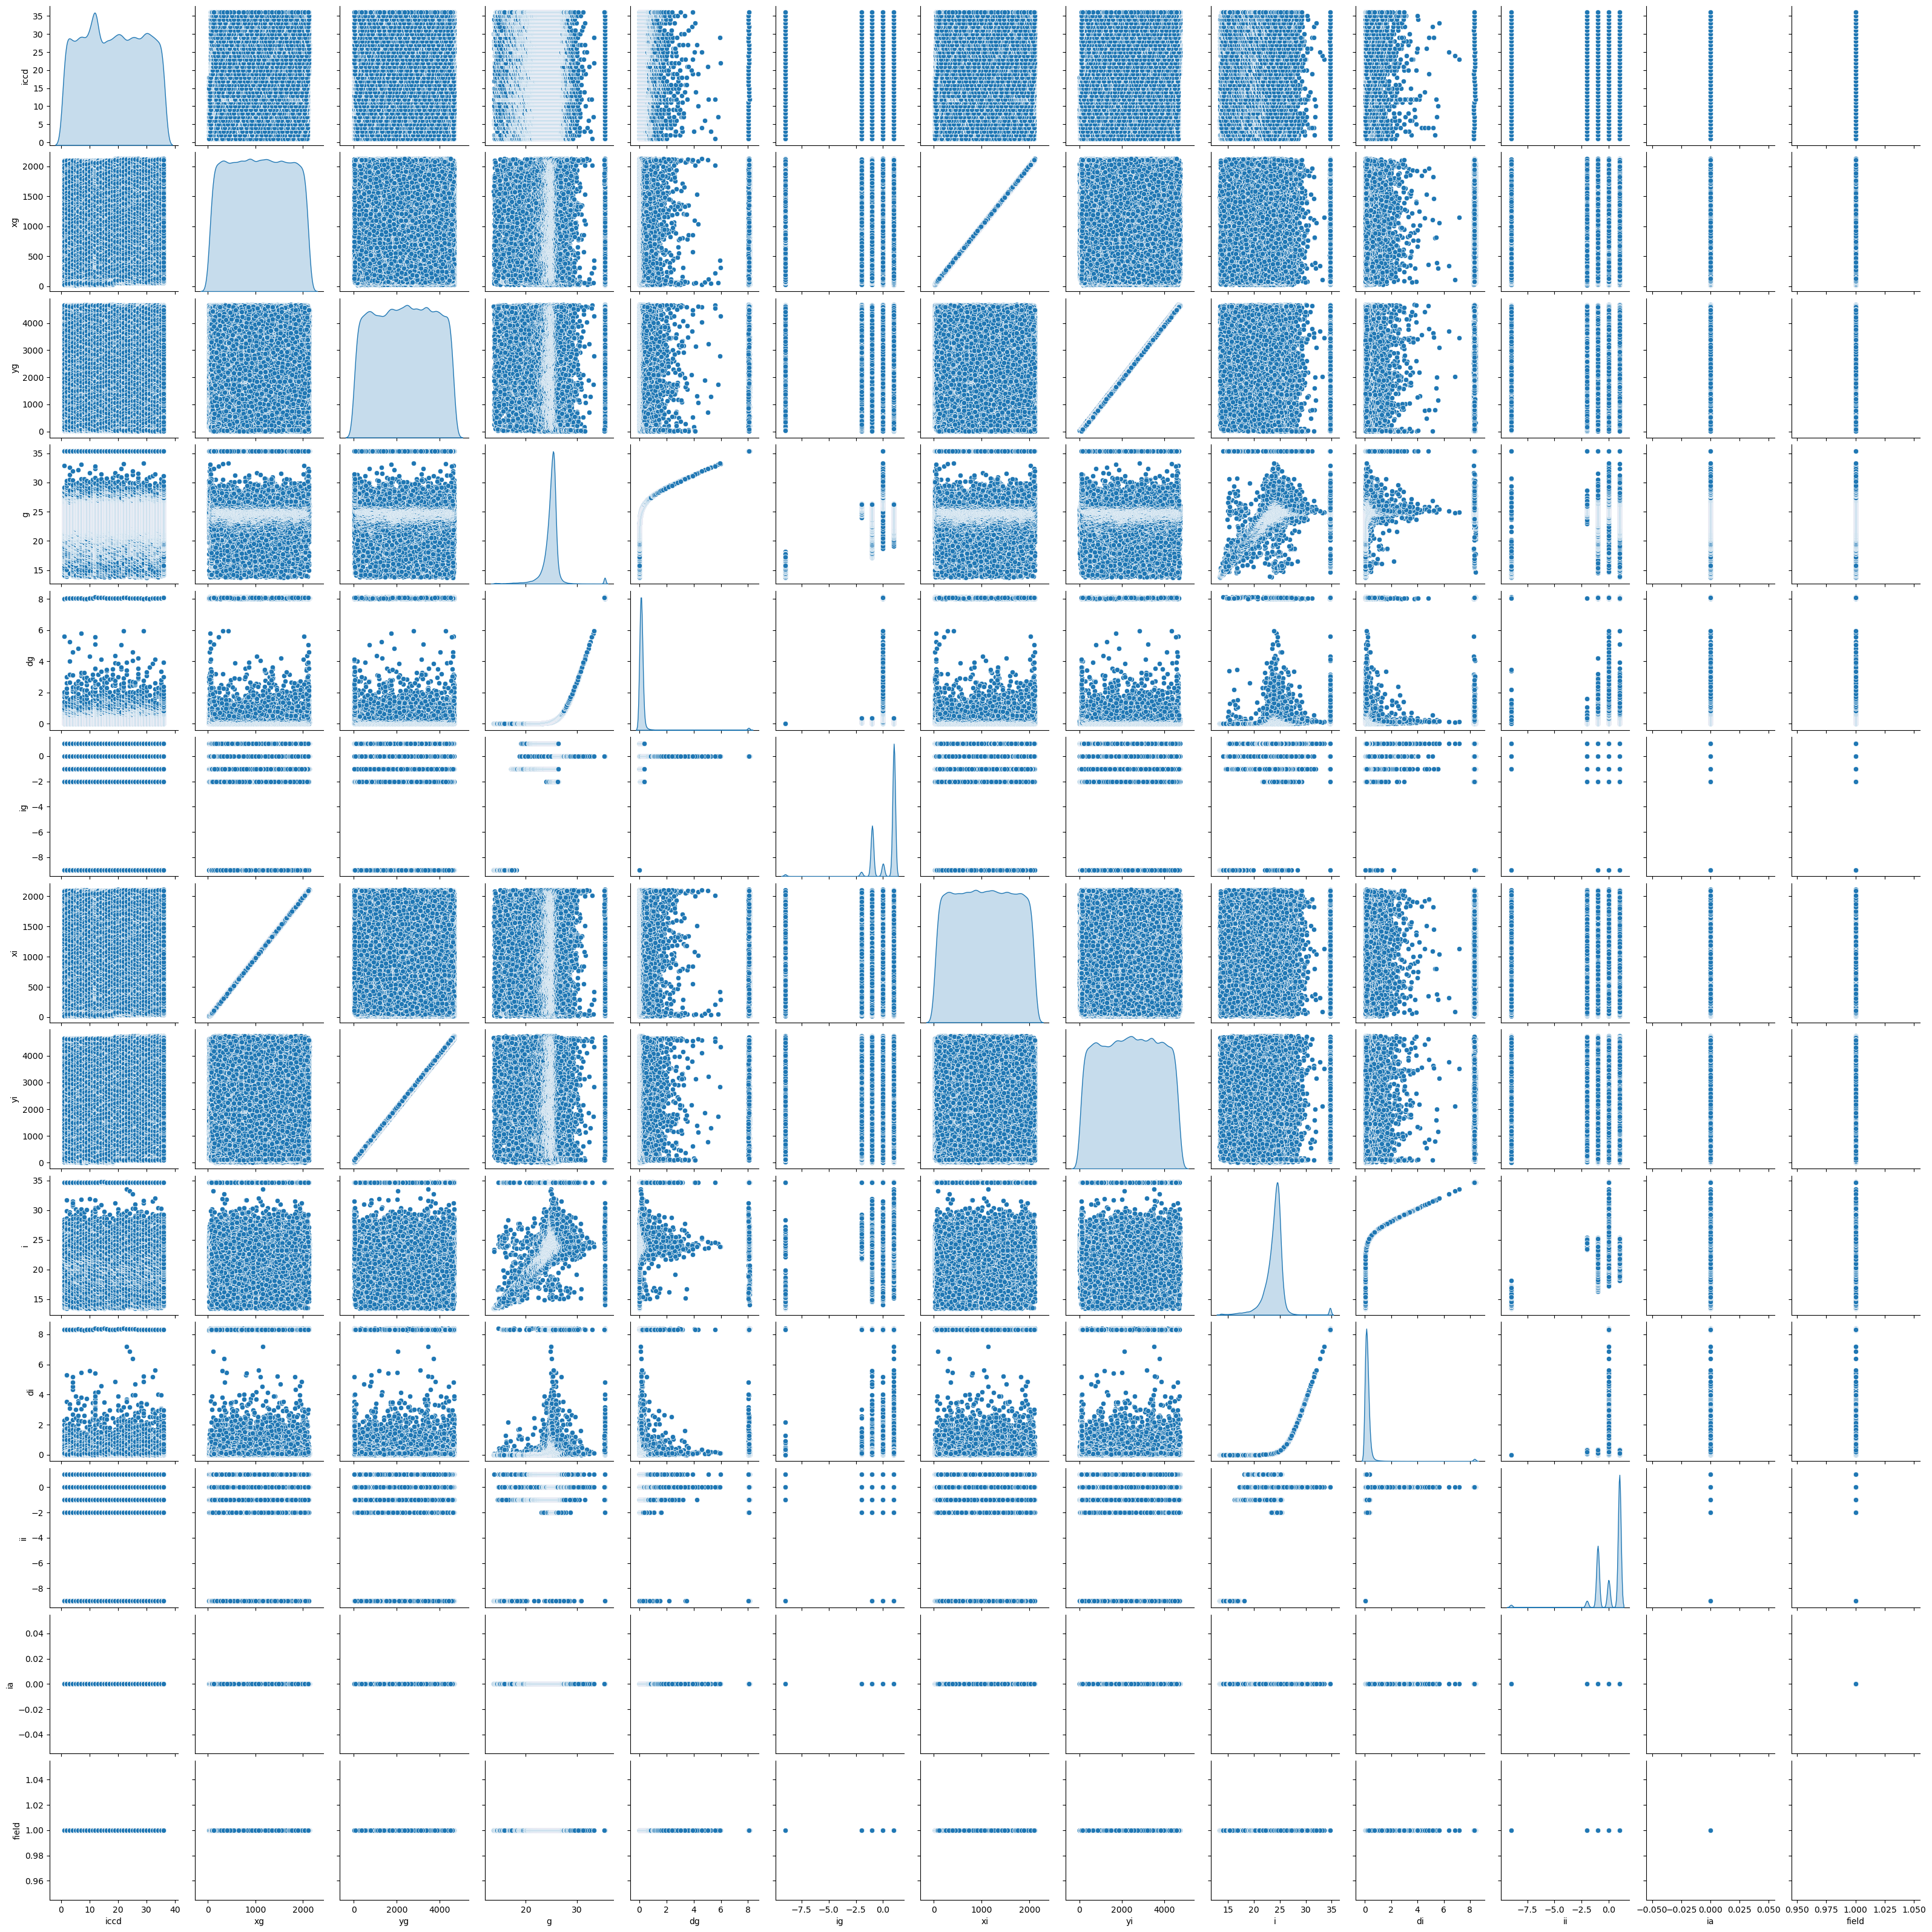

In [11]:
df_numeric = df.loc[:, ['iccd','xg','yg','g','dg','ig','xi','yi', 'i','di','ii','ia','field']]
sns.pairplot(df_numeric, diag_kind = "kde")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
y = pd.DataFrame()
print(data)
df = data.copy(['RADEG','DECDEG'])
df = df.drop(['CLASS'], axis=1)
df_y = df.loc[:, ['CLASS']]
y = pd.DataFrame(df_y,columns=["CLASS"])
print(df)
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.33, random_state = 42)

          RADEG     DECDEG  CLASS
0      9.962537  40.969619    1.0
1     10.010729  41.198203    1.0
2     10.039204  41.184903    1.0
3     10.074675  41.377858    1.0
4     10.084663  40.732864    1.0
...         ...        ...    ...
2179  22.822500  45.728611    4.0
2180  23.190833  42.958889    4.0
2181  23.496250  42.633889    4.0
2182  23.525000  45.725556    4.0
2183  23.664583  44.094722    4.0

[2184 rows x 3 columns]


KeyError: "None of [Index(['CLASS'], dtype='object')] are in the [columns]"

In [43]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;

In [44]:
df.dtypes

RADEG     float64
DECDEG    float64
dtype: object

In [45]:
x_train

,RADEG,DECDEG,CLASS
654,10.109517,41.228500,4.0
817,9.860908,41.904214,3.0
1318,10.826683,40.989925,1.0
465,11.209500,41.156353,4.0
1448,10.410542,40.875992,6.0
...,...,...,...
1638,8.872167,41.709250,4.0
1095,11.295808,41.648967,3.0
1130,10.127617,40.748439,1.0
1294,10.474200,40.913658,6.0


In [40]:
y_train

,CLASS
654,4.0
817,3.0
1318,1.0
465,4.0
1448,6.0
...,...
1638,4.0
1095,3.0
1130,1.0
1294,6.0


In [41]:
import numpy as np

RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
y_predicted = RFC.predict(x_test)
score = RFC.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

/var/folders/5z/fppys3dn27df6rctm0p78hq80000gn/T/ipykernel_19653/4929154.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(x_train,y_train)


Accuracy : 0.994
